In [1]:
import sys, wave
import numpy as np
from numpy import array, int16
from scipy.signal import lfilter, butter
from scipy.io.wavfile import read,write
from scipy import signal
from IPython.lib.display import Audio
from scipy.fftpack import fft , ifft, fftshift, ifftshift 
import matplotlib.pyplot as plt
from scipy.io import loadmat
from matplotlib.ticker import FormatStrFormatter
%matplotlib notebook
pi = np.pi
gsignal = 0
Fs = 0
xn = 0

In [8]:
def Read_Audio(filename):
    global Fs, xn
    Fs, xn = read(filename)
    xn = convert_to_mono_audio(xn)
    Plot_Spectrum(xn,Fs)
    Plot_Waveform(xn,Fs)
    global gsignal
    gsignal = xn
def Plot_Spectrum(signal, points):        #Herhangi bir sinyalin arzu edilen noktada fourieri alınıp çizilmesi
    N = points
    w = np.arange(-pi,pi, 2*pi/N)
    xw = fftshift(fft(signal, N)/N)
    plt.figure(figsize = (16,9))
    plt.stem(w/np.pi, abs(xw))
    plt.xlabel('$\omega$')
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f π'))
    plt.title('Genlik Grafiği')

def Plot_Waveform(signal, Fs):
    N = len(signal)
    n = np.arange(0, N)
    plt.figure()
    plt.plot(n/Fs,signal/np.max(signal)) # zaman cinsinden belirtmek için n/Fs yapılmıştır.
    plt.xlabel("t-(s)")
    plt.title('Signal')

def convert_to_mono_audio(input_audio):
    output_audio = []
    temp_audio = input_audio.astype(float)
    for i in temp_audio:
        output_audio.append((i[0] / 2) + (i[1] / 2))   #2 sütundaki değerlerin ortalaması alındı ve bunlar tek kanala sokuldu.
    return np.array(output_audio, dtype = 'int16')
        
def set_reverse(input_audio):
    reverse_audio = input_audio[::-1]  #Satır ve sütunların yeri değiştirilerek ses tersten oynatılacak
    return reverse_audio

def set_echo(delay, audio_data, gain):
    output_audio = np.zeros(len(audio_data))
    output_delay = delay * Fs
    
    for count, i, in enumerate(audio_data):
        output_audio[count] = i + gain * audio_data[count - int(output_delay)]
    
    return output_audio
    
def set_speed(speed_factor, xn):
    sound_index = np.round(np.arange(0, len(xn), speed_factor))
    yn = xn[sound_index[sound_index < len(xn)].astype(int)]

    return yn

def distortion(x, gain):
    q=x*gain/np.max(np.abs(x));
    z=np.sign(-q)*(1-np.exp(np.sign(-q)*q))
    y=z*np.max(np.abs(x))/np.max(np.abs(z))
    return y

def bass_effect(xn, gain):
    filter_data = loadmat('filters/bass_lpf.mat') #fc =250Hz
   
    Coeffs = filter_data['ba'].astype(np.float) 
    b = Coeffs[0,:] 
    yn = lfilter(b, 1,xn*gain)   
    
    final_audio = (yn + xn)/2
    return final_audio,yn

def treble_effect(xn, gain):
    filter_data = loadmat('filters/treble_hp.mat') #fc =4000Hz
    
    Coeffs = filter_data['ba'].astype(np.float) 
    b = Coeffs[0,:] 
    yn = lfilter(b, 1,xn*gain)
    
    final_audio = (yn + xn)/2
    return final_audio,yn

def equalizer(xn, gain, mode): 
        
    # N = 1000
        
    # 20Hz-60Hz-->Sub-bass   
    if mode == 1:   
        efilter_data = loadmat('filters/equalizer_20Hz-60Hz.mat') 
        
    # 60Hz-200Hz-->Bass
    elif mode == 2: 
        efilter_data  = loadmat('filters/equalizer_60Hz-250Hz.mat') 
        
    # 200Hz-600Hz-->Lower mids
    elif mode == 3: 
        efilter_data  = loadmat('filters/equalizer_200Hz-600Hz.mat') 
        
    # 600Hz-3kHz-->Mids
    elif mode == 4: 
        efilter_data  = loadmat('filters/equalizer_600Hz-3kHz.mat') 
        
    # 3kHz-8kHz-->Upper-Mids
    elif mode == 5: 
        efilter_data  = loadmat('filters/equalizer_3kHz-8kHz.mat') 
        
    # 8kHz-20kHz-->Highs
    elif mode == 6: 
        efilter_data  = loadmat('filters/equalizer_8kHz-20kHz.mat') 
     
    Coeffs = efilter_data ['ba'].astype(np.float) 
    b = Coeffs[0,:] 
    yn = lfilter(b, 1,xn*gain)   
    final_audio = (yn + xn)/2
    
    return final_audio, yn
 

def find_name(file):
    for index in range(len(file)):
        if file[::-1][index] == '.':
            index += 1
            break
    return file[:-index]

def Save_output(filename):     #Dosya kaydeden fonksiyon
    global Fs
    write(filename, Fs, array(xn, dtype = int16))
    
def reverb(loadname ,xn):
    # Import Music
    audio = read(loadname)
    xn = np.array(audio[1], dtype='float')
    Fs = audio[0]

    # Import Impulse
    impulse = read("French_18th_Century_Salon.wav")
    impulse_arr = np.array(impulse[1], dtype='float')
    impulse_arr = np.multiply(impulse_arr, 1.0/np.max(impulse_arr))

    # Convert Reverb
    filtered = signal.convolve(xn, impulse_arr, mode='same', method='fft')
    #filtered = np.multiply(filtered, 1.0/np.max(np.abs(filtered)))

    # Write to the file
    if find_name('Reverb_Effect_1.wav') != 'Reverb_Effect_1.wav':
        write("Reverb_Effect_1.wav", rate=int(Fs), data=filtered.astype(np.float32))

    ############ Demonstration #############

    # Normal Sound with Reverb Effect
    Fs_r, xr = read("Reverb_Effect_1.wav")
    xr_n = xr[:,1]
    
    return xr_n


AUDIO FILES:
1. Ichika Nito - When a band only give you 5 seconds to audition 
2. ...
3. ...
4. ...
5. ...

Choose an audio file: 1


<IPython.core.display.Javascript object>


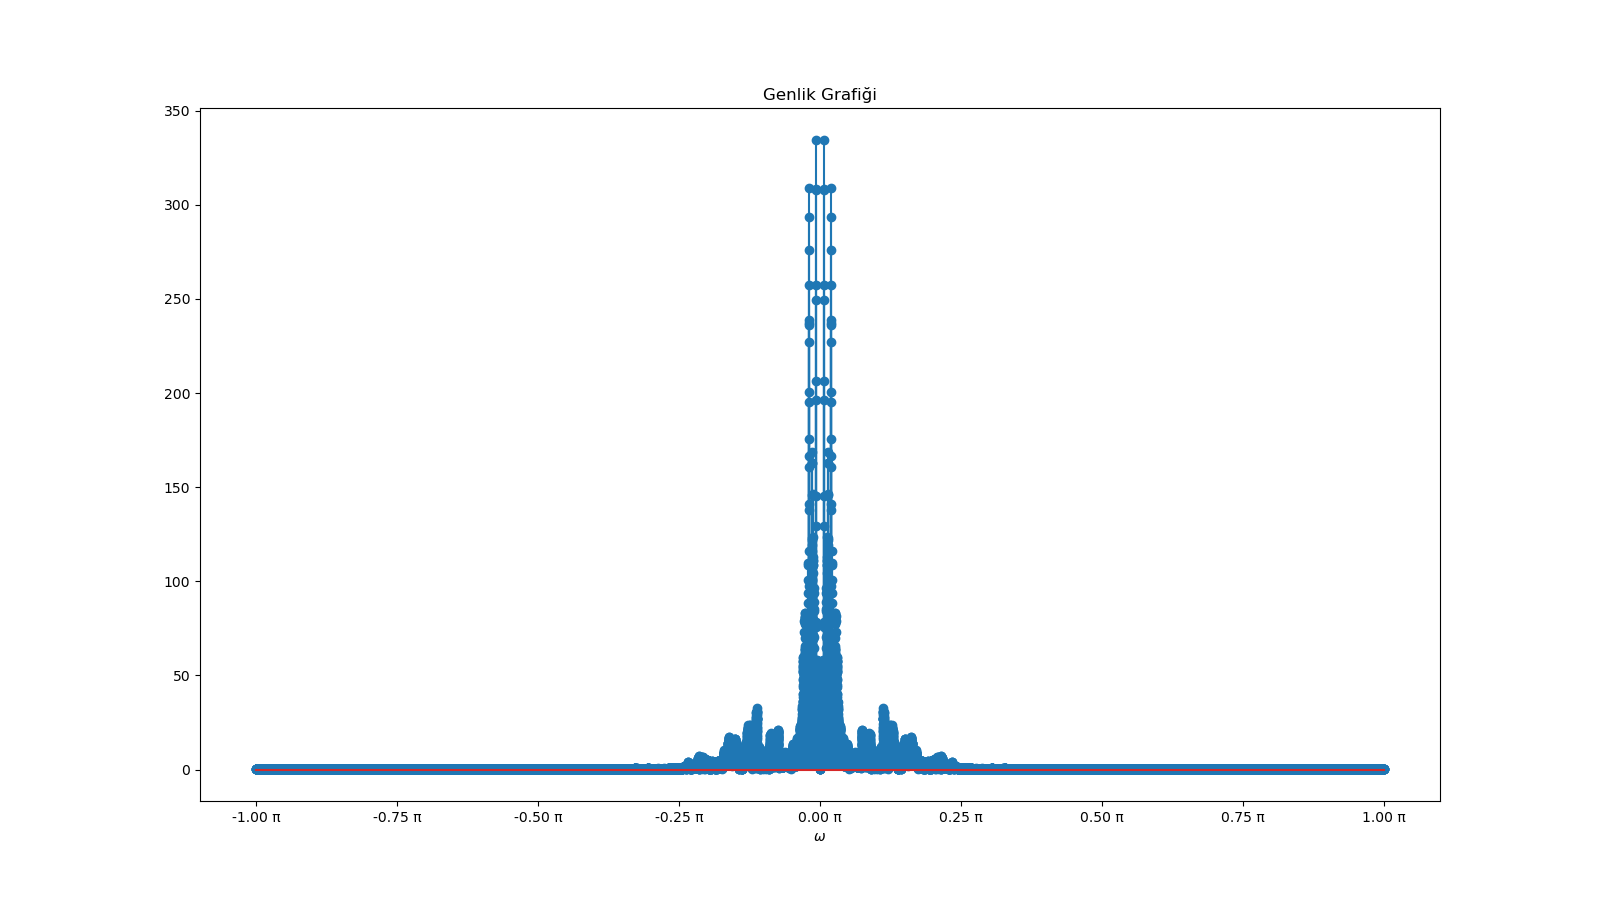

<IPython.core.display.Javascript object>


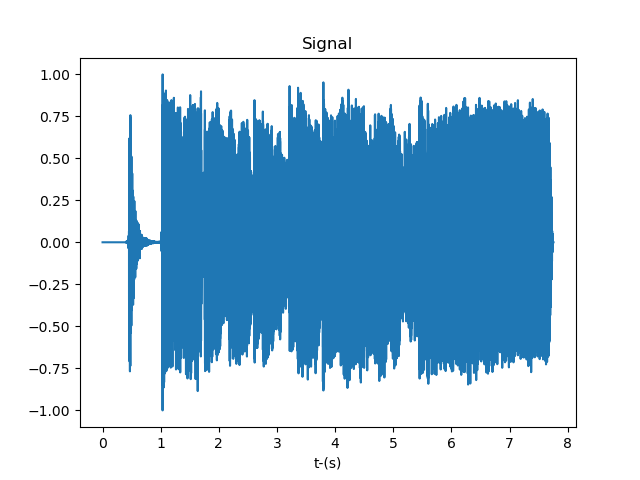

In [9]:
######## MENU SYSTEM #########

print("""
AUDIO FILES:
1. Ichika Nito - When a band only give you 5 seconds to audition 
2. ...
3. ...
4. ...
5. ...
""")
ans=input("Choose an audio file: ")
if ans=="1":
    Read_Audio("videoplayback.wav")
elif ans=="2":
    Read_Audio("videoplayback.wav")
elif ans=="3":
    Read_Audio("videoplayback.wav")
elif ans=="4":
    Read_Audio("videoplayback.wav")
elif ans=="5":
    Read_Audio("videoplayback.wav") 


***************************
*   1. Reverse Effect     *
*   2. Echo Effect        *
*   3. Speed Effect       *
*   4. Distortion Effect  * 
*   5. Bass Effect        *
*   6. Treble Effect      *
*   7. Reverb Effect      *
*   8. Equalizer Settings *  
***************************

Choose a number: 7


<IPython.core.display.Javascript object>


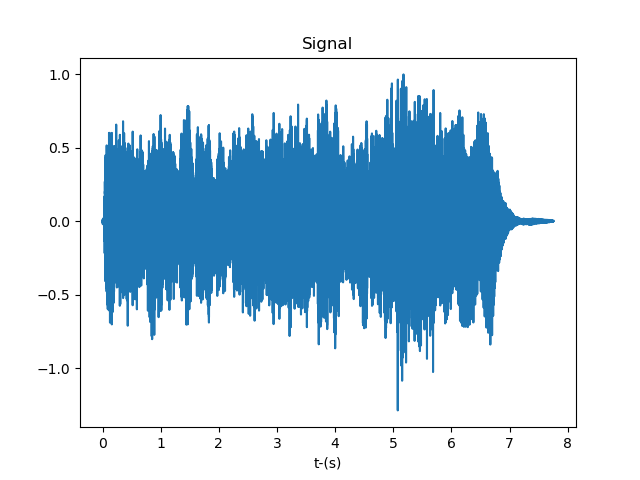

<IPython.core.display.Javascript object>


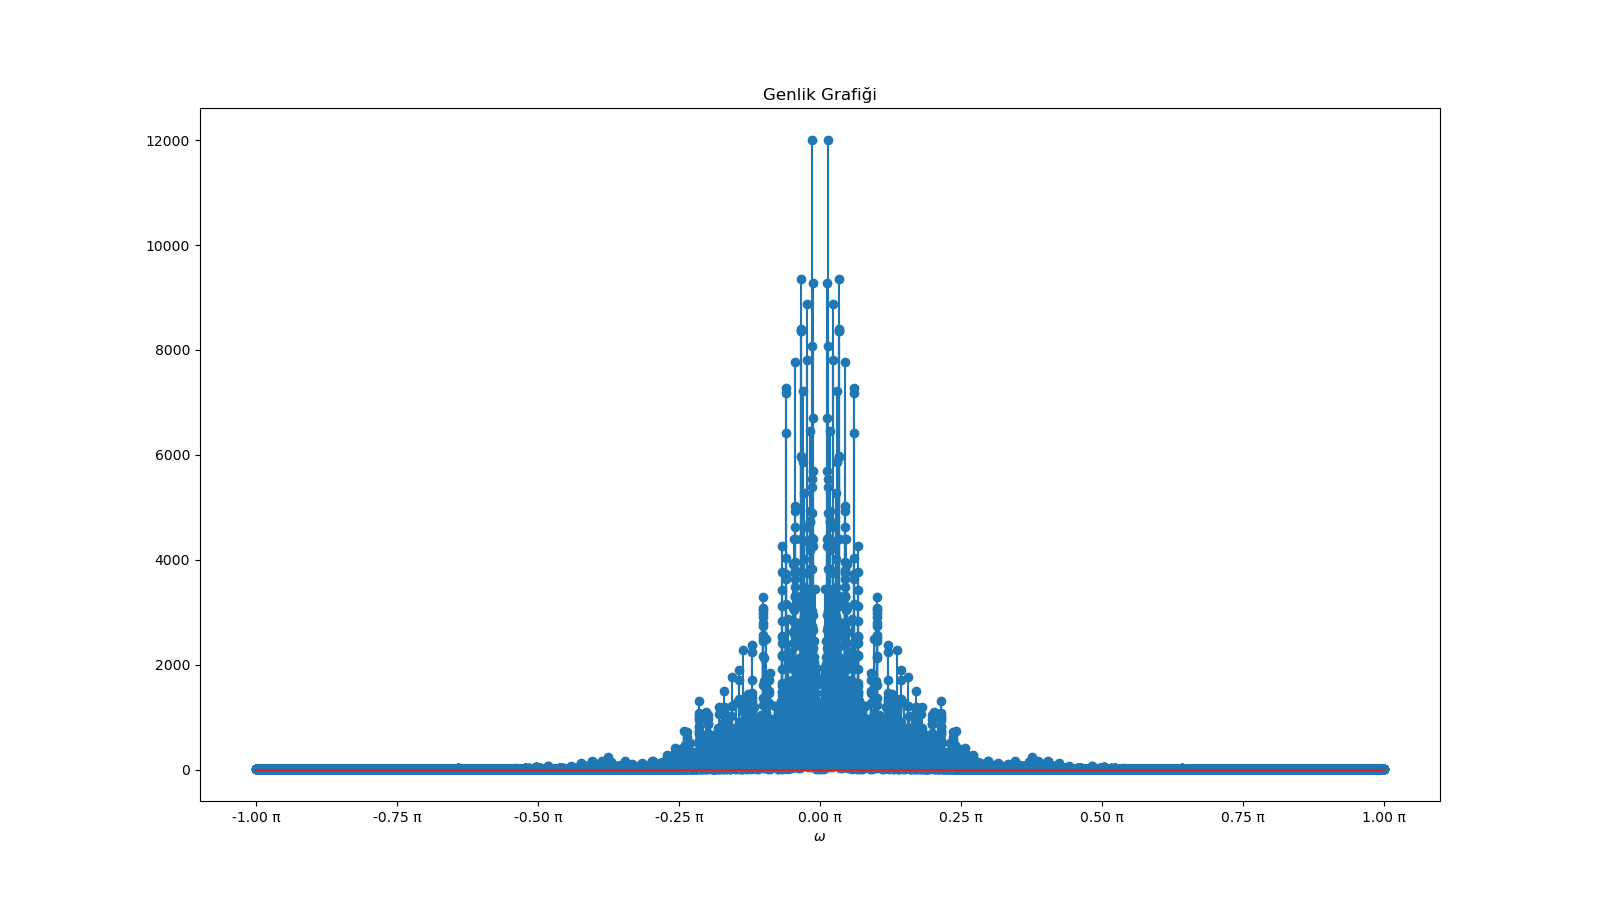

In [10]:
print("""
***************************
*   1. Reverse Effect     *
*   2. Echo Effect        *
*   3. Speed Effect       *
*   4. Distortion Effect  * 
*   5. Bass Effect        *
*   6. Treble Effect      *
*   7. Reverb Effect      *
*   8. Equalizer Settings *  
***************************
""")

ans=input("Choose a number: ")
#SUCCESS
if ans=="1":
    reverse_audio = set_reverse(xn)
    Plot_Waveform(reverse_audio, Fs)
    Plot_Spectrum(reverse_audio, Fs)
    display(Audio(reverse_audio, rate=Fs))

#SUCCESS
elif ans=="2":
    delay = float(input("Choose delay: "))
    gain = float(input("Choose gain: "))
    echo_audio = set_echo(delay, xn, gain) 
    Plot_Waveform(echo_audio, Fs)
    Plot_Spectrum(echo_audio, Fs)
    display(Audio(echo_audio, rate=Fs))    
#SUCCESS
elif ans=="3":
    speed_factor = float(input("Choose speed factor: "))
    speed_audio = set_speed(speed_factor, xn)
    Plot_Waveform(speed_audio, Fs)
    Plot_Spectrum(speed_audio, Fs)
    display(Audio(speed_audio, rate=Fs))    
#SUCCESS
elif ans=="4":
    gain = float(input("Choose gain: "))
    dist_audio = distortion(xn, gain)
    Plot_Waveform(dist_audio, Fs)
    Plot_Spectrum(dist_audio, Fs)
    display(Audio(dist_audio, rate=Fs))
#SUCCESS
elif ans=="5":
    gain = float(input("Choose gain: "))
    bass_audio,yn = bass_effect(xn, gain)
    Plot_Waveform(yn, Fs)
    Plot_Spectrum(yn, Fs)
    display(Audio(bass_audio, rate=Fs))
#SUCCESS
elif ans=="6":
    gain = float(input("Choose gain: "))
    treble_audio,yn = treble_effect(xn, gain)
    Plot_Waveform(yn, Fs)
    Plot_Spectrum(yn, Fs)
    display(Audio(treble_audio, rate=Fs))
#SUCCESS
elif ans=="7":       
    reverb_audio = reverb('videoplayback.wav', xn)
    Plot_Waveform(reverb_audio, Fs)
    Plot_Spectrum(reverb_audio, Fs)
    display(Audio(reverb_audio, rate=Fs))
#SUCCESS
elif ans=="8":
    print("""
    MODES:
    1. Sub-bass
    2. Bass
    3. Lower Mids
    4. Mids
    5. Upper Mids
    6. Highs
    """)        
    mode = float(input("Choose mode: "))
    gain = float(input("Choose gain: "))
    equ_audio,yn = equalizer(xn, gain, mode)
    Plot_Waveform(yn, Fs)
    Plot_Spectrum(yn, Fs)
    display(Audio(equ_audio, rate=Fs))